<div style="text-align: center"> <h1>Exp.6.3 Scientific Computing using Scikit Learn - Logistic Regression</h1></div>

**Aim:**

To perform prediction of iris data using Linear regression using sklearn python library package.

**Procedure:**

Step 1: Start the ‘ipython’ or ‘jupyter-notebook’ session from the terminal 

Step 2: Check the scipy version installed in your environment by typing ‘sklearn.__version__’

Step 3: If not installed means run the ‘%pip install sklearn’ magic command to install the sklearn python library package.

Step 4: Import the library in the session with an alias by typing ‘import sklearn’

Step 5: Perform classification using Linear regression.

Step 6: Verify the output

In [1]:
# Import Standard Libraries
import warnings
warnings.filterwarnings('ignore')

import wget
import numpy as np
import pandas as pd
import sklearn.metrics 
import seaborn as sns
import matplotlib.pyplot as plt

# Import ML Libaries 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
### Load the Iris dataset

In [3]:
path_to_data ='C:/Users/St.Josephs/Documents/PythonCode Test/iris.csv'
path_to_data

'C:/Users/St.Josephs/Documents/PythonCode Test/iris.csv'

In [4]:
iris = pd.read_csv(path_to_data)
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [5]:
#To know the data types of the variables.
iris.dtypes

sepal.length    float64
sepal.width     float64
petal.length    float64
petal.width     float64
variety          object
dtype: object

In [6]:
# the information about Dataset
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
# the count of each class we use value_counts()
iris['variety'].value_counts()

variety
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64

In [8]:
#Separating independant variable and dependent variable("variety")
#X = iris.drop(['variety','target'], axis=1)
X = iris.drop(['variety'], axis=1)
y = iris['variety']
# print(X.head())
print(X.shape)
# print(y.head())
print(y.shape)

(150, 4)
(150,)


### Scatter Plot

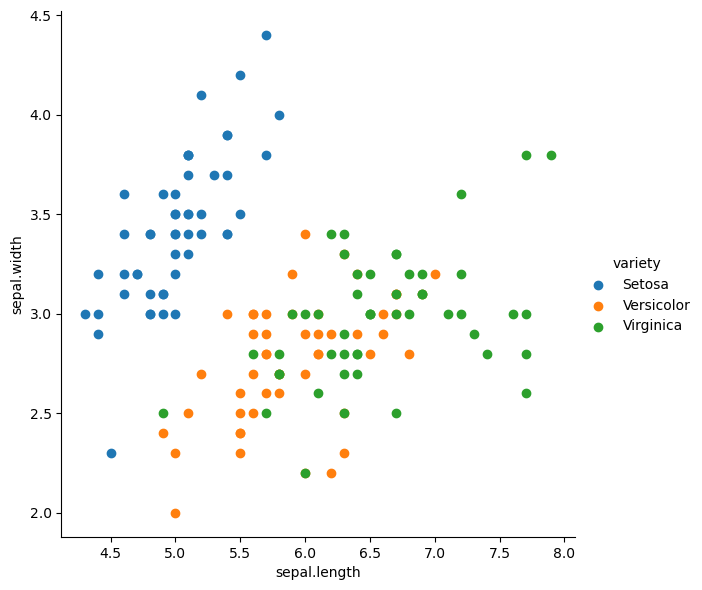

In [9]:
sns.FacetGrid(iris,hue='variety',height=6).map(plt.scatter,'sepal.length','sepal.width').add_legend()

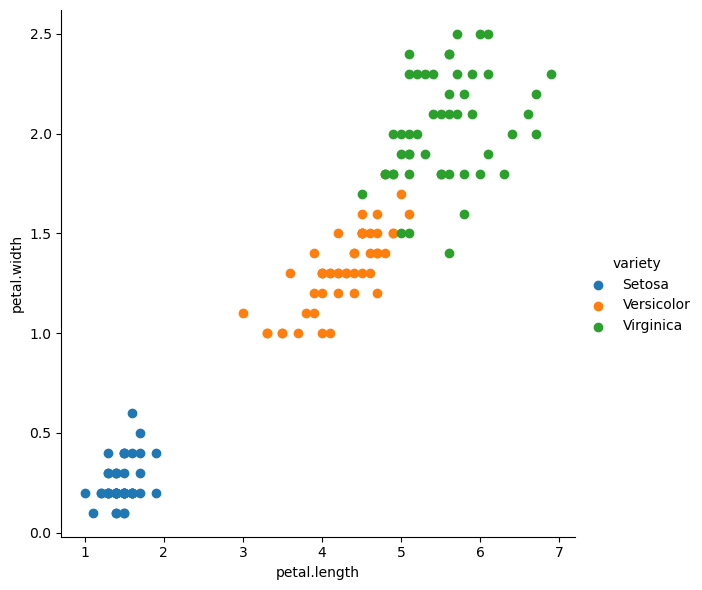

In [10]:
sns.FacetGrid(iris,hue='variety',height=6).map(plt.scatter,'petal.length','petal.width').add_legend()

### Logistic Regression

Converting categorical variables into numbers

In [11]:
mapping_cat={'Setosa':0,'Versicolor':1,'Virginica':2}

In [12]:
iris['variety']=iris['variety'].map(mapping_cat)

In [13]:
iris.head(10)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


### Preparing Inputs and Outputs

In [14]:
X=iris[['sepal.length','sepal.width','petal.length','petal.width']].values

In [15]:
y=iris[['variety']].values

### Splitting the dataset to Train and test

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### The shape of the train and test dataset.

In [17]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(105, 4)
(105, 1)
(45, 4)
(45, 1)


### Create a Logistic Regression model

In [18]:
model = LogisticRegression()

In [19]:
# Fit the model to the data
model.fit(X_train, Y_train)

LogisticRegression()

### Make predictions on the testing data

In [20]:
Y_pred = model.predict(X)
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [21]:
confusionmatrix = sklearn.metrics.confusion_matrix(y, Y_pred)
print("Confusion Matrix: \n", confusionmatrix)

Confusion Matrix: 
 [[50  0  0]
 [ 0 47  3]
 [ 0  0 50]]


In [22]:
cm_df = pd.DataFrame(confusionmatrix,
                     index = ['SETOSA','VERSICOLR','VIRGINICA'], 
                     columns = ['SETOSA','VERSICOLR','VIRGINICA'])
print("Confusion Matrix: \n", cm_df)

Confusion Matrix: 
            SETOSA  VERSICOLR  VIRGINICA
SETOSA         50          0          0
VERSICOLR       0         47          3
VIRGINICA       0          0         50


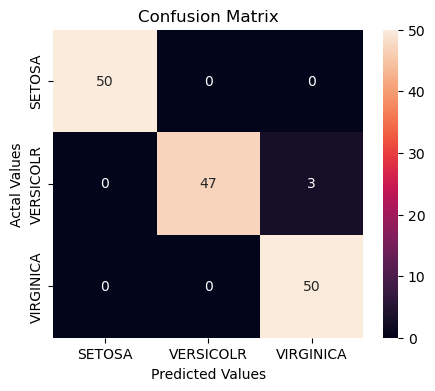

In [23]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [24]:
accuracy = accuracy_score(y, Y_pred)
print('Over all Accuracy:', accuracy)

Over all Accuracy: 0.98


In [25]:
#classification report for training set 
print(classification_report(y, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      0.94      0.97        50
           2       0.94      1.00      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



**Result:**
    
Thus, the Logistic Regression is used to predict the iris dataset successfully.